# Example session for calculating ENSO3.4 index

## Directly calling the module

In [1]:
from climate_index_collection.output import compute_index
from climate_index_collection.indices import (
    north_atlantic_oscillation,
    southern_annular_mode,
    el_nino_southern_oscillation_34,
)
import pytest
import ipytest
ipytest.autoconfig()


In [2]:
compute_index?

Signature:
compute_index(
    data_path='../data/test_data/',
    data_source_name='FOCI',
    index_function=<function southern_annular_mode at 0x7f3656a27c10>,
)
Docstring:
Compute index from data source and return xarray DataArray.

Parameters
----------
data_path: str | path
    Location of the data files. Defaults to "data/test_data/".
data_source_name: str
    Name of the model dataset. Defaults to "FOCI".
index_function: function
    Index function. Defaults to southern_annular_mode.

Returns
-------
xarray DataArray
File:      /work/climate_index_collection/output.py
Type:      function


/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/core/indexing.py:423: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)
/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing with an out-of-order index is generating 10 times more chunks
  return self.array[key]


<xarray.DataArray 'ENSO34' (time: 120)>
dask.array<mean_agg-aggregate, shape=(120,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2350-02-28 23:52:00 ... 2360-01-31 23:52:00

array(4.3710074e-08, dtype=float32)

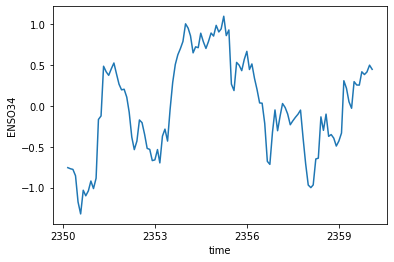

In [3]:
FOCI_ENSO = compute_index(
    data_path="../data/test_data/", 
    data_source_name="FOCI", 
    index_function=el_nino_southern_oscillation_34,
)
display(FOCI_ENSO)
FOCI_ENSO.plot();
FOCI_ENSO.mean().values

/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing with an out-of-order index is generating 10 times more chunks
  return self.array[key]


<xarray.DataArray 'ENSO34' (time: 120)>
dask.array<mean_agg-aggregate, shape=(120,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0001-03-01 00:00:00 ... 0011-02-01 00:00:00

array(-2.3841858e-08, dtype=float32)

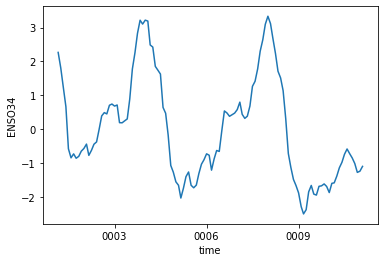

In [4]:
CESM_ENSO = compute_index(
    data_path="../data/test_data/", 
    data_source_name="CESM", 
    index_function=el_nino_southern_oscillation_34,
)
display(CESM_ENSO)
CESM_ENSO.plot()
CESM_ENSO.mean().values

In [5]:
print("FOCI temporal mean", FOCI_ENSO.mean("time").values)
print("CESM temporal mean", CESM_ENSO.mean("time").values)

FOCI temporal mean 4.3710074e-08
CESM temporal mean -2.3841858e-08


In [17]:
from climate_index_collection.data_loading import VARNAME_MAPPING, load_data_set
from pathlib import Path
import numpy
@pytest.mark.parametrize("source_name", list(VARNAME_MAPPING.keys()))
def test_enso34_zeromean(source_name, rtol = 1e-8):
    """Checks if the mean of the ENSO3.4 anomalies are close to 0 using numpy.allclose()
    rtol : float 
        relative accuracy Default of 1e-6.
    
    Absolute accuracy is calculated with (max(data_set) - min(data_set)) * rtol
    For further information look at numpy.allclose()
    From numpy:
    "The tolerance values are positive, typically very small numbers. 
    The relative difference (rtol * abs(b)) and the absolute difference atol are added together 
    to compare against the absolute difference between a and b."
    """
    # Load test data
    TEST_DATA_PATH = Path(__file__).parent / "../data/test_data/"
    data_set = load_data_set(data_path=TEST_DATA_PATH, data_source_name=source_name)
    
    # Calculate ENSO 3.4 index
    result = el_nino_southern_oscillation_34(data_set=data_set)
    # to calculate the absolute tolerance, we use :
    # ( max(data_set) - min(data_set) ) * rtol
    min_value = data_set["sea-surface-temperature"].min().values
    max_value = data_set["sea-surface-temperature"].max().values
    atol = (max_value-min_value)*rtol
    result_mean = result.mean("time")
    assert_allclose(
                actual = result_mean, 
                desired = result_mean*0,
                rtol = rtol,
                atol = atol,
                equal_nan = True)

In [18]:
ipytest.run()

======================================= test session starts ========================================
platform linux -- Python 3.9.12, pytest-7.1.2, pluggy-1.0.0
rootdir: /work, configfile: pyproject.toml
plugins: anyio-3.5.0
collected 2 items

tmpbs2x_bv6.py ..                                                                            [100%]

========================================= warnings summary =========================================
notebooks/tmpbs2x_bv6.py::test_enso34_zeromean[FOCI]
  /srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
    dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)

notebooks/tmpbs2x_bv6.py::test_enso34_zeromean[FOCI]
  /srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/core/indexing.py:423: SerializationWarning: Unable to decode t

<ExitCode.OK: 0>

In [12]:
from numpy.testing import assert_allclose
assert_allclose?

Signature:
assert_allclose(
    actual,
    desired,
    rtol=1e-07,
    atol=0,
    equal_nan=True,
    err_msg='',
    verbose=True,
)
Docstring:
Raises an AssertionError if two objects are not equal up to desired
tolerance.

The test is equivalent to ``allclose(actual, desired, rtol, atol)`` (note
that ``allclose`` has different default values). It compares the difference
between `actual` and `desired` to ``atol + rtol * abs(desired)``.

.. versionadded:: 1.5.0

Parameters
----------
actual : array_like
    Array obtained.
desired : array_like
    Array desired.
rtol : float, optional
    Relative tolerance.
atol : float, optional
    Absolute tolerance.
equal_nan : bool, optional.
    If True, NaNs will compare equal.
err_msg : str, optional
    The error message to be printed in case of failure.
verbose : bool, optional
    If True, the conflicting values are appended to the error message.

Raises
------
AssertionError
    If actual and desired are not equal up to specified precis

In [9]:
print("FOCI temporal mean", FOCI_ENSO.mean("time").values)
print("CESM temporal mean", CESM_ENSO.mean("time").values)

FOCI temporal mean 4.3710074e-08
CESM temporal mean -2.3841858e-08
